In [51]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [52]:
from helpers import load_data

# load dataset
x, y = load_data()

In [53]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [54]:
from refik_lib.costs import compute_mse
from refik_lib.ridge_regression import ridge_regression
from refik_lib.build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    # Preparing the test and training data sets
    ind = range(y.shape[0])
    ind_te = k_indices[k]
    ind_tr = list(set(ind) - set(ind_te))
    y_tr, y_te = y[ind_tr], y[ind_te]
    x_tr, x_te = x[ind_tr], x[ind_te]
    
    # Building polynomial data, feature expansion
    x_ply_tr = build_poly(x_tr, degree)
    x_ply_te = build_poly(x_te, degree)

    # Getting weights for ridge regression
    w = ridge_regression(y_tr, x_ply_tr, lambda_)
    
    # Computing loss from training and test data
    loss_tr = compute_mse(y_tr, x_ply_tr, w)
    loss_te = compute_mse(y_te, x_ply_te, w)

    return loss_tr, loss_te

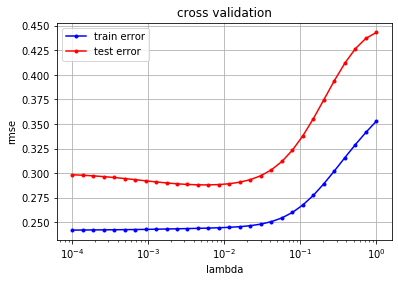

In [55]:
from plots import cross_validation_visualization

def cross_validation_demo(degree = 7):
    seed = 1
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    for lambda_ in lambdas:
        loss = [cross_validation(y, x, k_indices, k, lambda_, degree) 
                for k in range(k_fold)]
        k_rmse_tr, k_rmse_te = np.sqrt(np.mean(loss, axis=0))
        rmse_tr.append(k_rmse_tr)
        rmse_te.append(k_rmse_te)
    
    plots = cross_validation_visualization(lambdas, rmse_tr, rmse_te)

    return rmse_tr, rmse_te, plots
    
_, _, plots = cross_validation_demo()
plots

### Selecting the best polynomial degree for the model

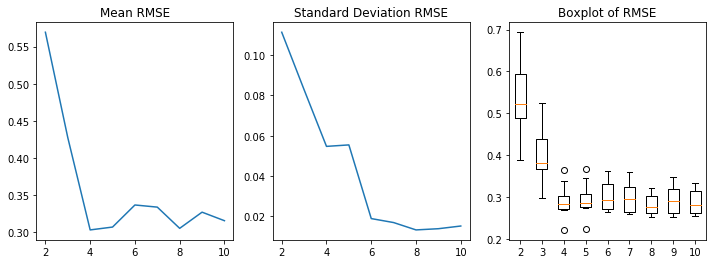

In [69]:
def select_model_degree(min_d=2, max_d=10):
    seed = 1
    k_fold = 4
    lambda_ = 0.1
    degrees = list(range(min_d, max_d+1))
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of test data
    rmse_te = []
    rmse_sd_te = []
    rmse_te_lst = []
    
    for degree in degrees:
        loss = [cross_validation(y, x, k_indices, k, lambda_, degree) 
                for k in range(k_fold)]
        d_rmse_tr,    d_rmse_te    = np.mean(np.sqrt(loss), axis=0)
        d_rmse_sd_tr, d_rmse_sd_te = np.std(np.sqrt(loss), axis=0)
        rmse_te.append(d_rmse_te)
        rmse_sd_te.append(d_rmse_sd_te)
        rmse_te_lst.append(np.sqrt(loss).flatten())
    
    fig, ax_lst = plt.subplots(1,3, figsize=(12, 4))

    ax_lst[0].plot(degrees, rmse_te)
    ax_lst[0].set_title("Mean RMSE")
    ax_lst[1].plot(degrees, rmse_sd_te)
    ax_lst[1].set_title("Standard Deviation RMSE")
    ax_lst[2].boxplot(rmse_te_lst, labels=degrees)
    ax_lst[2].set_title("Boxplot of RMSE")
    
    return fig
    
fig = select_model_degree()        

Looks like any degree above 4 looks OK. 

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()